In [1]:
import torch
import torch.nn.functional as F
from transformers import AutoModel, AutoTokenizer

/data/gunsbrother/anaconda3/envs/sbert3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 얘만 로드 하면 텍스트 인코더 딱 나오나?
state_dict = torch.load('/data/gunsbrother/prjs/ltvu/ours/-cache_dir/egovlp-config-removed.pth', map_location='cpu')

In [3]:
model_hf = AutoModel.from_pretrained('distilbert-base-uncased', local_files_only=True)

In [4]:
model1 = AutoModel.from_pretrained('distilbert-base-uncased', local_files_only=True, state_dict=state_dict['state_dict'])

Some weights of DistilBertModel were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.word_embeddings.weight', 'transformer.layer.0.attention.k_lin.bias', 'transformer.layer.0.attention.k_lin.weight', 'transformer.layer.0.attention.out_lin.bias', 'transformer.layer.0.attention.out_lin.weight', 'transformer.layer.0.attention.q_lin.bias', 'transformer.layer.0.attention.q_lin.weight', 'transformer.layer.0.attention.v_lin.bias', 'transformer.layer.0.attention.v_lin.weight', 'transformer.layer.0.ffn.lin1.bias', 'transformer.layer.0.ffn.lin1.weight', 'transformer.layer.0.ffn.lin2.bias', 'transformer.layer.0.ffn.lin2.weight', 'transformer.layer.0.output_layer_norm.bias', 'transformer.layer.0.output_layer_norm.weight', 'transformer.layer.0.sa_layer_norm.bias', 'transformer.layer.0.sa_layer_norm.weight', 'transformer.layer.1.attention.k

In [26]:
model2 = AutoModel.from_pretrained('distilbert-base-uncased', local_files_only=True, state_dict=new_state)

In [11]:
max_name_length = max(len(name) for name, _ in model_hf.named_parameters())
for name, param in model_hf.named_parameters():
    print(f'{name: <{max_name_length+5}} {str(list(param.shape)):15}', end=' ')

embeddings.word_embeddings.weight                 [30522, 768]    embeddings.position_embeddings.weight             [512, 768]      embeddings.LayerNorm.weight                       [768]           embeddings.LayerNorm.bias                         [768]           transformer.layer.0.attention.q_lin.weight        [768, 768]      transformer.layer.0.attention.q_lin.bias          [768]           transformer.layer.0.attention.k_lin.weight        [768, 768]      transformer.layer.0.attention.k_lin.bias          [768]           transformer.layer.0.attention.v_lin.weight        [768, 768]      transformer.layer.0.attention.v_lin.bias          [768]           transformer.layer.0.attention.out_lin.weight      [768, 768]      transformer.layer.0.attention.out_lin.bias        [768]           transformer.layer.0.sa_layer_norm.weight          [768]           transformer.layer.0.sa_layer_norm.bias            [768]           transformer.layer.0.ffn.lin1.weight               [3072, 768]     transforme

In [16]:
max_name_length = max(len(k) for k in state_dict['state_dict'].keys())
for k, v in state_dict['state_dict'].items():
    print(f'{k: <{max_name_length+6}} {str(list(v.shape)):15}', end=' ')

module.text_model.embeddings.word_embeddings.weight                  [30522, 768]    module.text_model.embeddings.position_embeddings.weight              [512, 768]      module.text_model.embeddings.LayerNorm.weight                        [768]           module.text_model.embeddings.LayerNorm.bias                          [768]           module.text_model.transformer.layer.0.attention.q_lin.weight         [768, 768]      module.text_model.transformer.layer.0.attention.q_lin.bias           [768]           module.text_model.transformer.layer.0.attention.k_lin.weight         [768, 768]      module.text_model.transformer.layer.0.attention.k_lin.bias           [768]           module.text_model.transformer.layer.0.attention.v_lin.weight         [768, 768]      module.text_model.transformer.layer.0.attention.v_lin.bias           [768]           module.text_model.transformer.layer.0.attention.out_lin.weight       [768, 768]      module.text_model.transformer.layer.0.attention.out_lin.bias     

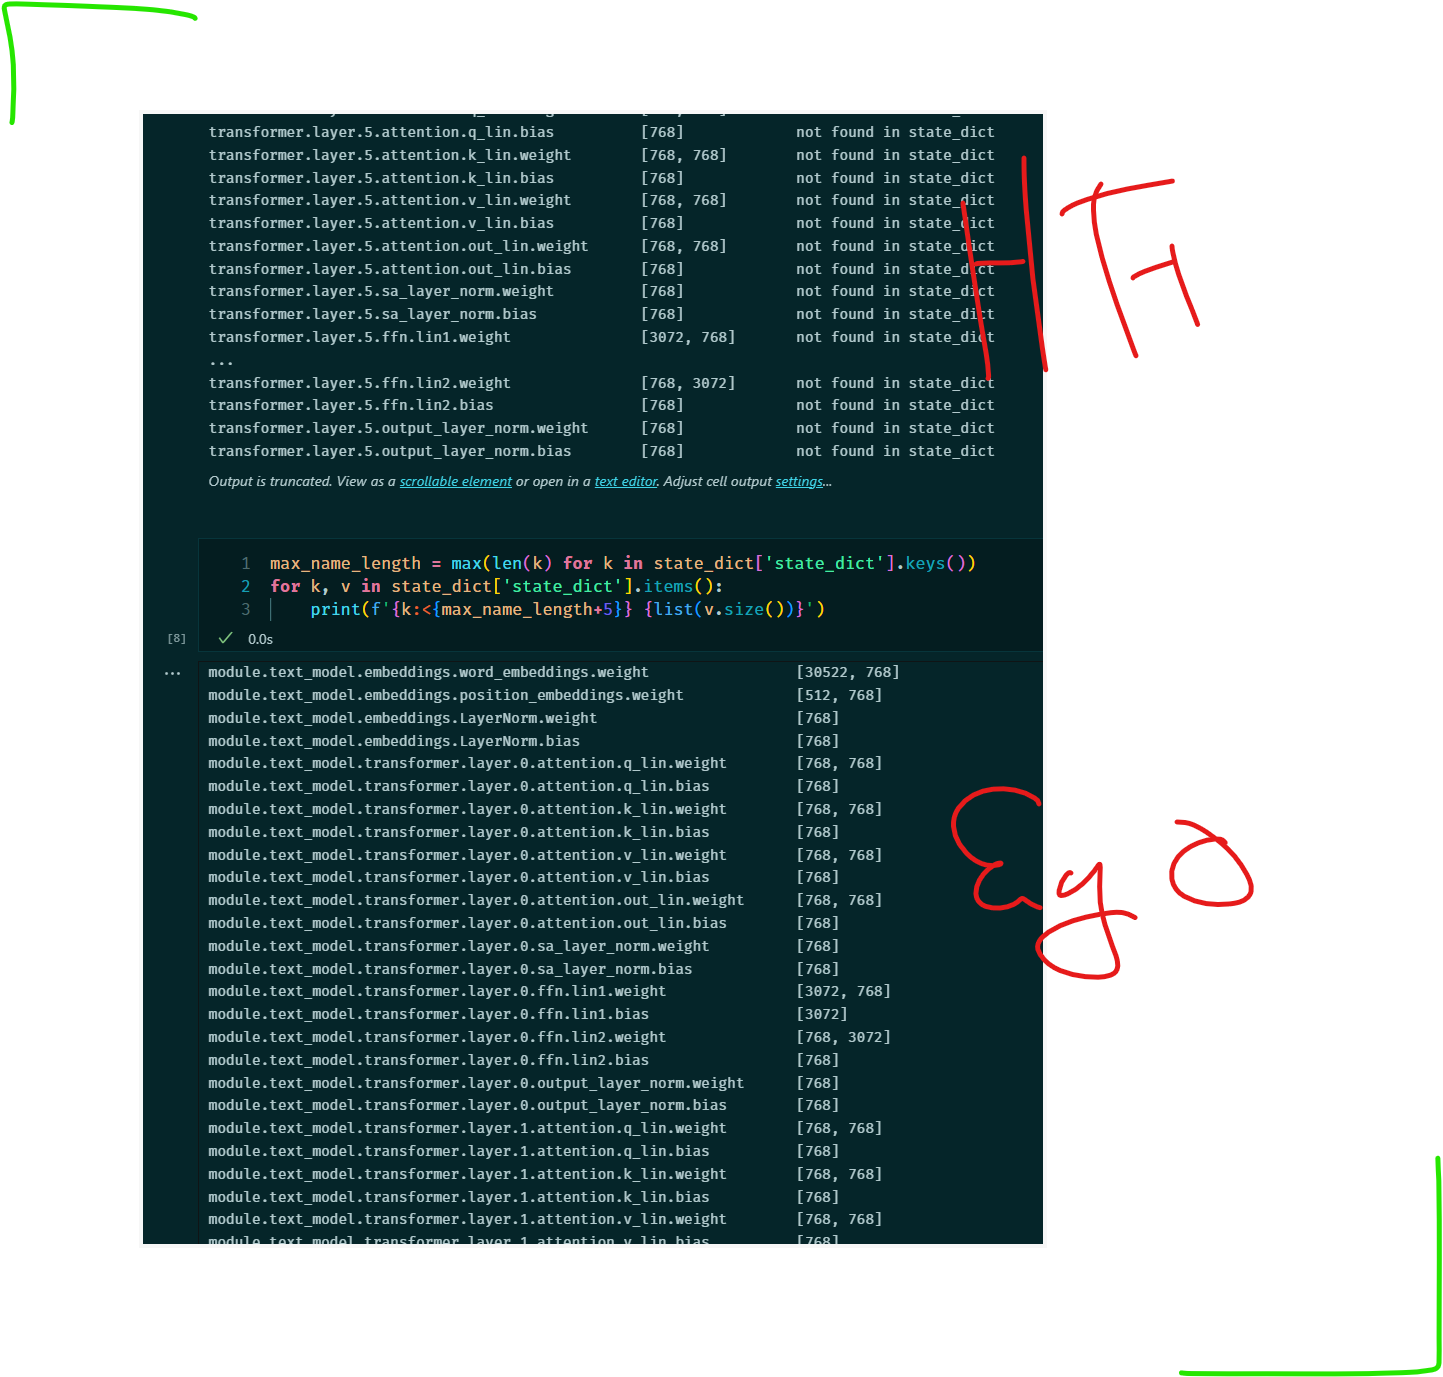

# 1. `'module.text_model.'` -> `''`
# 2. `'module.video_model.'` -> 버림

In [25]:
new_state = {}
for k, v in state_dict['state_dict'].items():
    if k.startswith('module.text_model.'):
        new_state[k.replace('module.text_model.', '')] = v


In [32]:
from transformers import AutoTokenizer

sentences = [
    "Hello, my dog is cute",
    "Hello, my cat is cute",
    "Hello, my dog is cute",
    "Hello, my cat is cute",
    '#C C is holding a book.',
    '#C C writes something on the book.',
    '#C C picks a pan to cook.',
]
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased', local_files_only=True)
tokens = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')
tokens.input_ids

tensor([[  101,  7592,  1010,  2026,  3899,  2003, 10140,   102,     0,     0,
             0],
        [  101,  7592,  1010,  2026,  4937,  2003, 10140,   102,     0,     0,
             0],
        [  101,  7592,  1010,  2026,  3899,  2003, 10140,   102,     0,     0,
             0],
        [  101,  7592,  1010,  2026,  4937,  2003, 10140,   102,     0,     0,
             0],
        [  101,  1001,  1039,  1039,  2003,  3173,  1037,  2338,  1012,   102,
             0],
        [  101,  1001,  1039,  1039,  7009,  2242,  2006,  1996,  2338,  1012,
           102],
        [  101,  1001,  1039,  1039, 11214,  1037,  6090,  2000,  5660,  1012,
           102]])

In [33]:
tokenizer.convert_ids_to_tokens(tokens.input_ids[0])

['[CLS]',
 'hello',
 ',',
 'my',
 'dog',
 'is',
 'cute',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [34]:
with torch.no_grad():
    outputs = model_hf.eval()(**tokens).last_hidden_state[:, 0]
    outputs1 = model1.eval()(**tokens).last_hidden_state[:, 0]
    outputs2 = model2.eval()(**tokens).last_hidden_state[:, 0]
    outputs = F.normalize(outputs, p=2, dim=1)
    outputs1 = F.normalize(outputs1, p=2, dim=1)
    outputs2 = F.normalize(outputs2, p=2, dim=1)
outputs.shape, outputs1.shape

(torch.Size([7, 768]), torch.Size([7, 768]))

In [35]:
outputs @ outputs.T

tensor([[1.0000, 0.9978, 1.0000, 0.9978, 0.9158, 0.9316, 0.9212],
        [0.9978, 1.0000, 0.9978, 1.0000, 0.9175, 0.9329, 0.9212],
        [1.0000, 0.9978, 1.0000, 0.9978, 0.9158, 0.9316, 0.9212],
        [0.9978, 1.0000, 0.9978, 1.0000, 0.9175, 0.9329, 0.9212],
        [0.9158, 0.9175, 0.9158, 0.9175, 1.0000, 0.9695, 0.9494],
        [0.9316, 0.9329, 0.9316, 0.9329, 0.9695, 1.0000, 0.9513],
        [0.9212, 0.9212, 0.9212, 0.9212, 0.9494, 0.9513, 1.0000]])

In [36]:
outputs1 @ outputs1.T

tensor([[1.0000, 0.9939, 1.0000, 0.9939, 0.9642, 0.9567, 0.9636],
        [0.9939, 1.0000, 0.9939, 1.0000, 0.9634, 0.9559, 0.9617],
        [1.0000, 0.9939, 1.0000, 0.9939, 0.9642, 0.9567, 0.9636],
        [0.9939, 1.0000, 0.9939, 1.0000, 0.9634, 0.9559, 0.9617],
        [0.9642, 0.9634, 0.9642, 0.9634, 1.0000, 0.9848, 0.9862],
        [0.9567, 0.9559, 0.9567, 0.9559, 0.9848, 1.0000, 0.9852],
        [0.9636, 0.9617, 0.9636, 0.9617, 0.9862, 0.9852, 1.0000]])

In [37]:
outputs2 @ outputs2.T

tensor([[1.0000, 0.7713, 1.0000, 0.7713, 0.3732, 0.2574, 0.2512],
        [0.7713, 1.0000, 0.7713, 1.0000, 0.3926, 0.2472, 0.2470],
        [1.0000, 0.7713, 1.0000, 0.7713, 0.3732, 0.2574, 0.2512],
        [0.7713, 1.0000, 0.7713, 1.0000, 0.3926, 0.2472, 0.2470],
        [0.3732, 0.3926, 0.3732, 0.3926, 1.0000, 0.5251, 0.4030],
        [0.2574, 0.2472, 0.2574, 0.2472, 0.5251, 1.0000, 0.2756],
        [0.2512, 0.2470, 0.2512, 0.2470, 0.4030, 0.2756, 1.0000]])

In [28]:
model_hf.transformer.layer[0].attention.q_lin.weight

Parameter containing:
tensor([[-0.0024,  0.0224, -0.0207,  ...,  0.0200,  0.0560,  0.0463],
        [ 0.0080,  0.0269, -0.0575,  ..., -0.0221,  0.1373,  0.0125],
        [-0.0043,  0.0318,  0.0189,  ..., -0.0107,  0.0083, -0.0422],
        ...,
        [ 0.0120, -0.0023,  0.0710,  ...,  0.0636,  0.0457, -0.0321],
        [ 0.0061,  0.0861,  0.0829,  ..., -0.0218,  0.1167,  0.0146],
        [-0.0096, -0.0904,  0.0143,  ..., -0.0473, -0.0973, -0.0282]],
       requires_grad=True)

In [29]:
model1.transformer.layer[0].attention.q_lin.weight

Parameter containing:
tensor([[-0.0253,  0.0457,  0.0547,  ..., -0.0356, -0.0072,  0.0262],
        [ 0.0265,  0.0026,  0.0045,  ...,  0.0168,  0.0108,  0.0068],
        [-0.0059, -0.0100,  0.0134,  ..., -0.0016, -0.0152, -0.0195],
        ...,
        [-0.0113, -0.0163, -0.0231,  ...,  0.0008, -0.0057, -0.0003],
        [-0.0366,  0.0151, -0.0264,  ..., -0.0112,  0.0359, -0.0040],
        [-0.0122, -0.0063, -0.0116,  ...,  0.0473, -0.0327,  0.0326]],
       requires_grad=True)

In [30]:
model2.transformer.layer[0].attention.q_lin.weight

Parameter containing:
tensor([[ 0.0077,  0.0126, -0.0160,  ...,  0.0241,  0.0803,  0.0247],
        [ 0.0046, -0.0508, -0.0096,  ..., -0.0268,  0.0860, -0.0078],
        [ 0.0179,  0.0033,  0.0534,  ...,  0.0427,  0.0290, -0.0662],
        ...,
        [-0.0101,  0.0297,  0.0617,  ...,  0.0355, -0.0172, -0.0466],
        [-0.0407,  0.0943,  0.0293,  ...,  0.0058,  0.1342, -0.0188],
        [-0.0237, -0.1016, -0.0043,  ..., -0.0573, -0.0610,  0.0235]],
       requires_grad=True)

In [22]:
state_dict['state_dict']['module.text_model.transformer.layer.0.attention.q_lin.weight'] 

tensor([[ 0.0077,  0.0126, -0.0160,  ...,  0.0241,  0.0803,  0.0247],
        [ 0.0046, -0.0508, -0.0096,  ..., -0.0268,  0.0860, -0.0078],
        [ 0.0179,  0.0033,  0.0534,  ...,  0.0427,  0.0290, -0.0662],
        ...,
        [-0.0101,  0.0297,  0.0617,  ...,  0.0355, -0.0172, -0.0466],
        [-0.0407,  0.0943,  0.0293,  ...,  0.0058,  0.1342, -0.0188],
        [-0.0237, -0.1016, -0.0043,  ..., -0.0573, -0.0610,  0.0235]])

In [27]:
new_state['transformer.layer.0.attention.q_lin.weight']

tensor([[ 0.0077,  0.0126, -0.0160,  ...,  0.0241,  0.0803,  0.0247],
        [ 0.0046, -0.0508, -0.0096,  ..., -0.0268,  0.0860, -0.0078],
        [ 0.0179,  0.0033,  0.0534,  ...,  0.0427,  0.0290, -0.0662],
        ...,
        [-0.0101,  0.0297,  0.0617,  ...,  0.0355, -0.0172, -0.0466],
        [-0.0407,  0.0943,  0.0293,  ...,  0.0058,  0.1342, -0.0188],
        [-0.0237, -0.1016, -0.0043,  ..., -0.0573, -0.0610,  0.0235]])